In [4]:
import numpy as np
import download_data as dl
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics
from conf_matrix import func_confusion_matrix
from sklearn.model_selection import train_test_split

## step 1: load data from csv file. 
data = dl.download_data('crab.csv').values

n = 200
#split data 
S = np.random.permutation(n)
#100 training samples
Xtr = data[S[:100], :6]
Ytr = data[S[:100], 6:]
# 100 testing samples
X_test = data[S[100:], :6]
Y_test = data[S[100:], 6:].ravel()


print(data)

[[ 0.  20.6 14.4 ... 46.5 19.6 -1. ]
 [ 1.  13.3 11.1 ... 32.3 11.3 -1. ]
 [ 0.  16.7 14.3 ... 37.  14.7  1. ]
 ...
 [ 1.   8.8  7.7 ... 20.8  7.4 -1. ]
 [ 1.  16.2 15.2 ... 40.1 13.9  1. ]
 [ 0.  15.6 14.  ... 35.3 13.8  1. ]]


In [5]:
## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.

#############placeholder 1: training/validation #######################
x_train,x_validation,y_train,y_validation = train_test_split(Xtr,Ytr,test_size=0.5)

#############placeholder end #######################



C:\Users\Pujan2\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


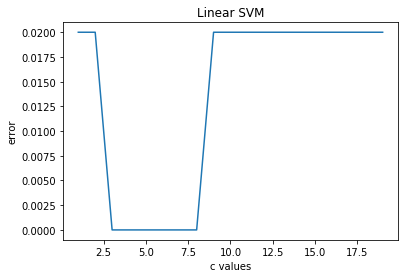

In [8]:
## step 3 Model selection over validation set
# consider the parameters C, kernel types (linear, RBF etc.) and kernel
# parameters if applicable. 


# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"
#############placeholder 2: Figure 1#######################
c_range =  range(1,20)
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=x_train, y=y_train)
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
#plt.xticks(c_range)
plt.show()
#############placeholder end #######################

C:\Users\Pujan2\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


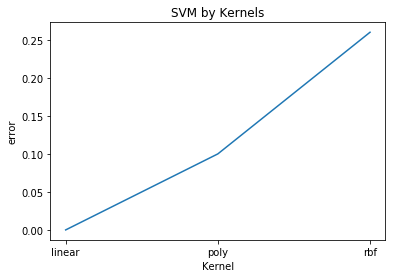

In [10]:
# 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel ( with other hyperparameters fixed) 
#############placeholder 3: Figure 2#######################
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    # your own codes
    model = svm.SVC(kernel=kernel_value, C=5)
    model.fit(X=x_train, y=y_train)
    error = 1. - model.score(x_validation, y_validation) 
    svm_kernel_error.append(error)

plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()
#############placeholder end #######################


In [12]:
## step 4 Select the best model and apply it over the testing subset 
#############placeholder 4:testing  #######################

best_kernel = 'linear'
best_c = 5 # poly had many that were the "best"
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=x_train, y=y_train)

#############placeholder end #######################

C:\Users\Pujan2\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
## step 5 evaluate your results in terms of accuracy, real, or precision. 

#############placeholder 5: metrics #######################

y_pred = model.predict(X_test)
conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

#############placeholder end #######################


Confusion Matrix: 
[[45  3]
 [ 2 50]]
Average Accuracy: 0.95
Per-Class Precision: [0.95744681 0.94339623]
Per-Class Recall: [0.9375     0.96153846]
b


In [37]:
#############placeholder 6: success and failure examples #######################

# Success samples: samples for which you model can correctly predict their labels
count = 0
print("Successful examples")
for i in range(0,100):
    if Y_test[i]==y_pred[i]:
        print("Y_test:" ,Y_test[i], "y_pred:" ,y_pred[i] )
        count = count+1

# Failure samples: samples for which you model can not correctly predict their labels

print("Failure examples")
for i in range(0,100):
    if Y_test[i]!=y_pred[i]:
        print("Y_test:" ,Y_test[i], "y_pred:" ,y_pred[i] )

        
#############placeholder end #######################


Successful examples
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_